In [106]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='2b4179a3-3e9a-4dc6-983e-006d2267219d', project_access_token='p-2c7d988e46ce4d2b2cecdb8f3ad7d0df497ed868')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [24]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [25]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [26]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Descargar los conjuntos de datos en formato .csv

In [87]:
import pandas as pd

In [29]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-16 02:06:59--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv.3’

    [ <=>                                   ] 2,327,419   --.-K/s   in 0.02s   

2020-09-16 02:06:59 (101 MB/s) - ‘training_dataset.csv.3’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [ ]:
df_training_dataset.info()

In [8]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [9]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



In [10]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['TARGET'])

In [11]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [142]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zerose = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=-1,
    verbose=0,
    copy=True
)

In [143]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
# Reconstruyendo un Pandas DataFrame con los resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zerose.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                   

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [144]:
df_training_dataset_imputed.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,-1,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [145]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

In [146]:
df_training_dataset_rmcolumns.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,40.0,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,24.0,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,24.0,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,24.0,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30.0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [147]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
df_e = pd.get_dummies(df_training_dataset_imputed, columns=['Banca_movil_userfriendly'])
#df_e = pd.get_dummies(df_training_dataset, columns=['Banca_movil_userfriendly'])
df_training.tail()

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,Banca_movil_userfriendly_No,Banca_movil_userfriendly_Si
23994,40.0,10.0,3.0,31.0,0.0,0.0,0.0,31.0,Perfil_3,0,1
23995,24.0,15.0,6.0,30.0,30.0,31.0,30.0,7.0,Perfil_0,0,1
23996,24.0,5.0,3.0,0.0,30.0,1.0,0.0,0.0,Perfil_4,0,1
23997,24.0,5.0,6.0,7.0,0.0,1.0,1.0,0.0,Perfil_4,1,0
23998,30.0,5.0,4.0,31.0,31.0,0.0,0.0,0.0,Perfil_3,1,0


# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [148]:
df_training.columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'],
      dtype='object')

In [149]:
from sklearn.impute import MissingIndicator
import numpy as np
ind = MissingIndicator(missing_values=np.NaN)
df_f = df_training_dataset.copy()
df_f[['Banca_movil_userfriendly','Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono']].replace({'0': np.NaN,0: np.NaN})
df_f = pd.get_dummies(df_f, columns=['Banca_movil_userfriendly'])
numeri = [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'
    ]
indicator = ind.fit_transform(df_f[numeri])
indicator = pd.DataFrame(indicator, columns=[ 'm'+str(i) for i in range(1,9)])
df_f = pd.concat([df_f, indicator], axis=1)
from sklearn.impute import SimpleImputer
#impute_zeros = SimpleImputer(missing_values=np.nan, strategy='mean',copy=True)
impute_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0, verbose=0, copy=True)
impute_zeros.fit(X=df_f[numeri])
# Reconstruyendo un Pandas DataFrame con los resultados
df_f[numeri] = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_f[numeri]
    ),
    columns=numeri
)

In [129]:
features = df_f[
    ['Años','Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 
'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 
'Banca_movil_userfriendly_No', 'Banca_movil_userfriendly_Si', 'm1', 'm2', 'm3', 
'm4', 'm5', 'm6', 'm7', 'm8']
]
target = df_f['TARGET']  ## No cambie esta variable

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133)

In [131]:
X_train = features
y_train = target

In [80]:
print(X_train.shape)
print(X_test.shape)

(23999, 1329)
(7920, 1329)


In [90]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [132]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [133]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Entrenando un árbol de decisión

In [134]:
import xgboost as xgb
para = {'objective':'multi:softprob','base_score': 0.5, 'gamma': 0, 'learning_rate': 1.0005, 'max_delta_step': 2, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 173,'nthread':-1}
dtc = xgb.XGBClassifier(**para)
model = dtc.fit(X_train, y_train.ravel())

### Haciendo predicciones en la muestra de prueba

In [135]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Perfil_4' 'Perfil_2' 'Perfil_3' ... 'Perfil_1' 'Perfil_3' 'Perfil_5']


### Analizando la calidad del modelo a través de la matriz de confusión

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

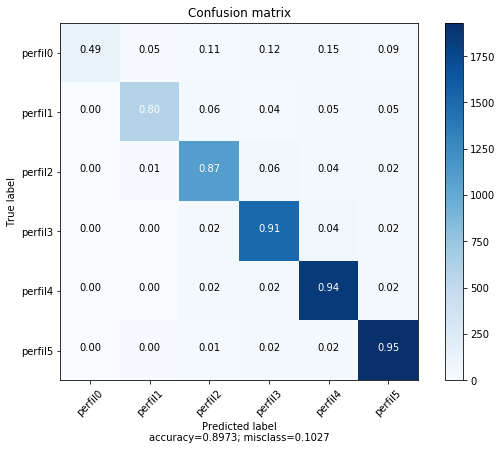

In [137]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])
#0.8587 with smote
#0.8607 without smote
#0.8973 with features as X_train

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [138]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-16 04:49:38--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.1’

    [ <=>                                   ] 87,631      --.-K/s   in 0.006s  

2020-09-16 04:49:38 (14.8 MB/s) - ‘to_be_scored.csv.1’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [112]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
ID                                   1000 non-null int64
Genero                               963 non-null object
Años                                 980 non-null float64
Estado_civil                         976 non-null object
Trabajo                              864 non-null object
Sector                               983 non-null object
Telefono                             927 non-null object
Anos_usando_internet_banking         977 non-null float64
Anos_usando_banca_movil              945 non-null float64
Banca_movil_userfriendly             1000 non-null object
Frecuencia_internet_banking_mes      911 non-null float64
Frecuencia_banca_movil_mes           940 non-null float64
Frecuencia_pagamentos_tarjeta_mes    991 non-null float64
Frecuencia_tarjeta_virtual_mes       977 non-null float64
Frecuencia_saldo_cuenta_mes          973 non-null float64
dtypes: float64(8), int64(1), 

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [150]:
# 1 - Removiendo filas con valores NaN 
df_to_be_scored_1 = df_to_be_scored

# 2 - Reemplazando con ceros los valores faltantes
impute_zerose.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zerose.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

# 4 - Encoding con "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])

df_to_be_scored_4.tail()
df_to_be_scored_4.head()
df_to_be_scored_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Años                                 1000 non-null float64
Anos_usando_internet_banking         1000 non-null float64
Anos_usando_banca_movil              1000 non-null float64
Frecuencia_internet_banking_mes      1000 non-null float64
Frecuencia_banca_movil_mes           1000 non-null float64
Frecuencia_pagamentos_tarjeta_mes    1000 non-null float64
Frecuencia_tarjeta_virtual_mes       1000 non-null float64
Frecuencia_saldo_cuenta_mes          1000 non-null float64
Banca_movil_userfriendly_No          1000 non-null uint8
Banca_movil_userfriendly_Si          1000 non-null uint8
dtypes: float64(8), uint8(2)
memory usage: 64.5 KB


<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [151]:
df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
].columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'],
      dtype='object')

In [152]:
df_to_be_scored_4.columns
X_test = df_to_be_scored_4[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
]

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [153]:
from sklearn.impute import MissingIndicator
df_f = df_to_be_scored.copy()
df_f[['Banca_movil_userfriendly','Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono']].replace({'0': np.NaN,0: np.NaN})
df_f = pd.get_dummies(df_f, columns=['Banca_movil_userfriendly'])
numeri = [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'
    ]
indicator = ind.transform(df_f[numeri])
indicator = pd.DataFrame(indicator, columns=[ 'm'+str(i) for i in range(1,9)])
df_f = pd.concat([df_f, indicator], axis=1)
# Reconstruyendo un Pandas DataFrame con los resultados
df_f[numeri] = pd.DataFrame.from_records(
    data=impute_zeros.transform(X=df_f[numeri]),columns=numeri)

In [154]:
X_test = df_f[
    ['Años','Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 
'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 
'Banca_movil_userfriendly_No', 'Banca_movil_userfriendly_Si', 'm1', 'm2', 'm3', 
'm4', 'm5', 'm6', 'm7', 'm8']
]

In [155]:
#df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0
X_test=poly.transform(X_test)
X_test = scaler.transform(X_test)

In [156]:
y_pred = dtc.predict(X_test)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()
df_to_be_scored_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Años                                 1000 non-null float64
Anos_usando_internet_banking         1000 non-null float64
Anos_usando_banca_movil              1000 non-null float64
Frecuencia_internet_banking_mes      1000 non-null float64
Frecuencia_banca_movil_mes           1000 non-null float64
Frecuencia_pagamentos_tarjeta_mes    1000 non-null float64
Frecuencia_tarjeta_virtual_mes       1000 non-null float64
Frecuencia_saldo_cuenta_mes          1000 non-null float64
Banca_movil_userfriendly_No          1000 non-null uint8
Banca_movil_userfriendly_Si          1000 non-null uint8
TARGET                               1000 non-null object
dtypes: float64(8), object(1), uint8(2)
memory usage: 72.3+ KB


### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [157]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7-donotdelete-pr-w1fspbocjhw6ku',
 'asset_id': 'bba12bab-561e-4422-bddb-aa8da2249b3d'}

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
